In [14]:
#importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#defining the parameters provided in the question

alpha = 5.6e-6 #m^2/s
k = 20 #W/(m.K)
h = 100 #W/(m^2.K)

#initial and final temperatures defined in Kelvin
T_i = 598
T_inf = 288

#corresponding space and time increments
delta_x = 15 #mm
delta_t = 18 #seconds

In [16]:
#We want the values of the temperature at the surface and at depth 45mm after 180 seconds have passed

time = 180
x = 45

#We now calculate the number of steps required to achieve the required depth and time

x_num = int(x/delta_x)
t_num = int(time/delta_t)

In [17]:
#Calculating the Biot's Number and Fourier's Number

biot = (h*delta_x*10**(-3))/k
fourier = (alpha*delta_t)/(delta_x*10**(-3))**2

print(f"Biot's Number : {biot:.4f}")
print(f"Fourier's Number : {fourier:.4f}")

Biot's Number : 0.0750
Fourier's Number : 0.4480


In [18]:
#Determining whether the system is thermally thick or thermally thin

if(biot<=0.1):
   print("The system is a thermally thin system within the given space increment")
else:
   print("The system is a thermally thick system within the given space increment")


The system is a thermally thin system within the given space increment


In [26]:
t_num = t_num+1
new_x_num = 10

T = np.zeros((t_num,new_x_num))

#Initializing the temperature at the surface node to T_i

for i in range(new_x_num):
    T[0,i] = T_i

for i in range(1,t_num):
    for j in range(new_x_num):

        if j == 0: 
            T[i,j] = 2*fourier*(T[i-1,j+1] + biot*T_inf) + (1-2*fourier-2*biot*fourier)*T[i-1,j]
        elif j == new_x_num-1:
            T[i,j] = fourier*2*T[i-1,j-1] + (1-2*fourier)*T[i-1,j]
        else:
            T[i,j] = fourier*(T[i-1,j+1] + T[i-1,j-1]) + (1-2*fourier)*T[i-1,j]


In [29]:
print(f"Temperature at depth 45 mm at time t = 180 seconds is {T[10,3]: .2f} K")
print(f"Temperature at the surface at time t = 180 seconds is {T[10,0]: .2f} K")

Temperature at depth 45 mm at time t = 180 seconds is  587.57 K
Temperature at the surface at time t = 180 seconds is  549.38 K


[  0.  18.  36.  54.  72.  90. 108. 126. 144. 162. 180.]


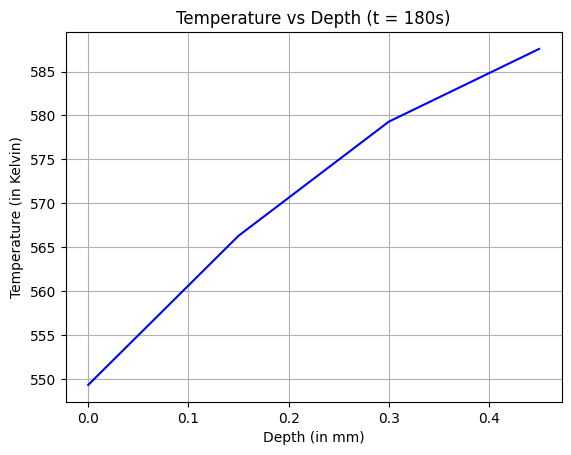

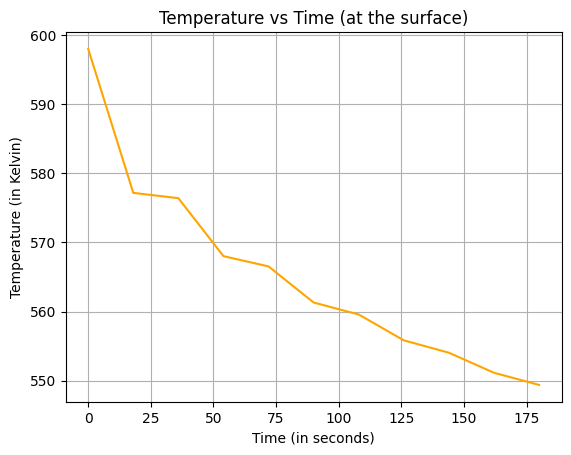

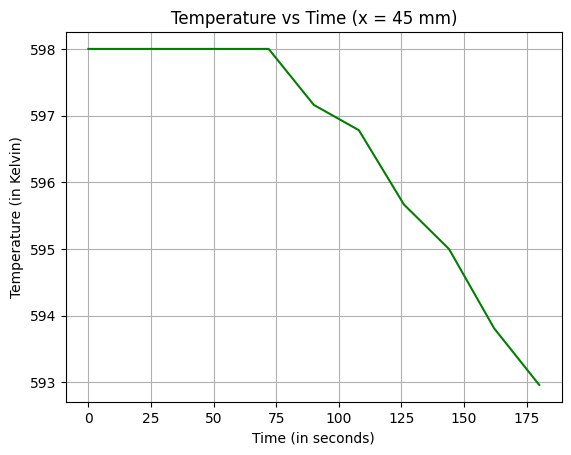

In [56]:
#Plotting Temperature against depth at t = 180s 

x = np.linspace(0, 1.5, num=int(1.5 / 0.15) + 1)
t = np.linspace(0,180, num = 11)

plt.plot(x[0:4], T[10,0:4], c = 'blue')
plt.title('Temperature vs Depth (t = 180s)')
plt.ylabel('Temperature (in Kelvin)')
plt.xlabel('Depth (in mm)')
plt.grid(True)
plt.show()

#Plotting Temperature vs Time at the surface 

plt.plot(t, T[0:11,0], c = 'orange')
plt.title('Temperature vs Time (at the surface)')
plt.ylabel('Temperature (in Kelvin)')
plt.xlabel('Time (in seconds)')
plt.grid(True)
plt.show()

#Plotting Temperature vs Time at the given depth x = 45 mm

plt.plot(t, T[0:11,4], c = 'green')
plt.title('Temperature vs Time (x = 45 mm)')
plt.ylabel('Temperature (in Kelvin)')
plt.xlabel('Time (in seconds)')
plt.grid(True)
plt.show()
